# Gráficas en PyPlot

**Referencias útiles**

* [Ejemplos](https://gist.github.com/gizmaa/7214002)
* [Documentación de PyPlot](https://github.com/stevengj/PyPlot.jl)
* [Tutorial de Matplotlib](http://matplotlib.org/users/pyplot_tutorial.html)
* [Ejemplos de Matplotlib](http://matplotlib.org/examples/)

In [1]:
using PyPlot

### Gráfica simple

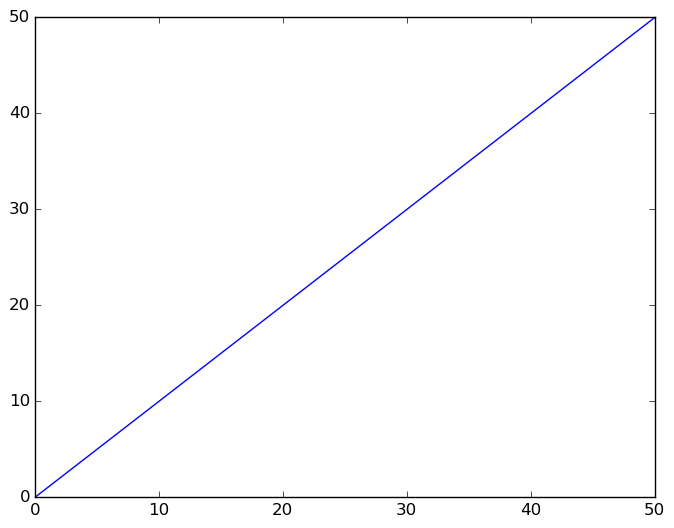

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7fa37e3ce350>

In [2]:
identidad = collect(0:50);
plot(identidad)

### Gráfica con leyenda

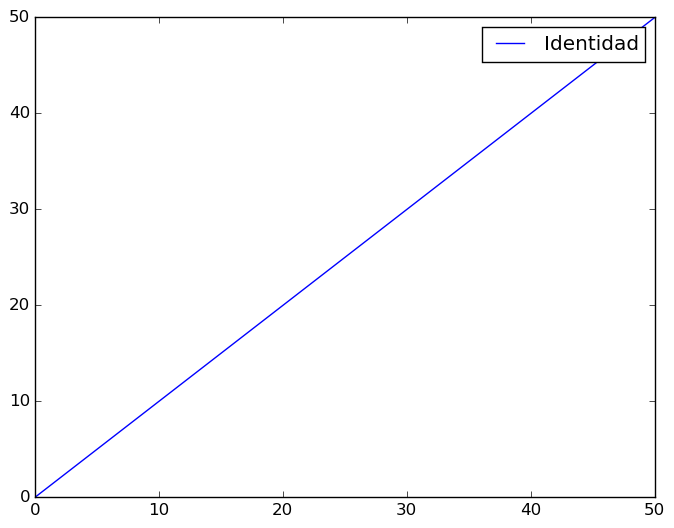

PyObject <matplotlib.legend.Legend object at 0x7fa37e22f410>

In [3]:
plot(identidad, label = "Identidad")
legend()

### Reubicación de leyenda

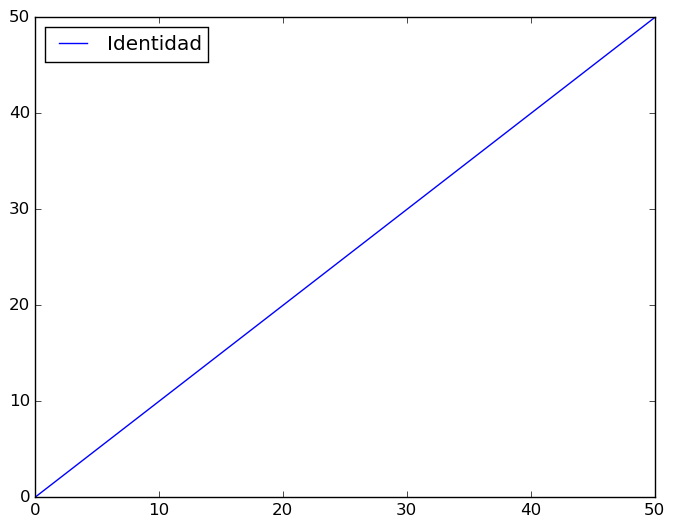

PyObject <matplotlib.legend.Legend object at 0x7fa37dd9d090>

In [9]:
plot(identidad, label = "Identidad")
legend(loc="upper left");
#show()

    'best'         : 0,
    'upper right'  : 1,
    'upper left'   : 2,
    'lower left'   : 3,
    'lower right'  : 4,
    'right'        : 5,
    'center left'  : 6,
    'center right' : 7,
    'lower center' : 8,
    'upper center' : 9,
    'center'       : 10.

### Gráficas con dominio y codominio

In [5]:
typeof(linspace(0,1,100))

LinSpace{Float64}

In [6]:
super(LinSpace)

Range{T<:AbstractFloat}

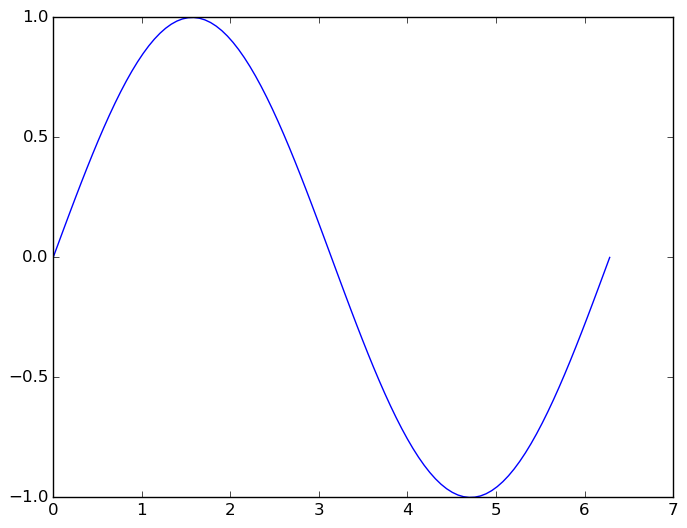

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7fa37dd46c10>

In [10]:
dominio = collect(linspace(0,2π,100))
plot(dominio,sin(dominio))
#show()

### Leyendas, títulos y límites

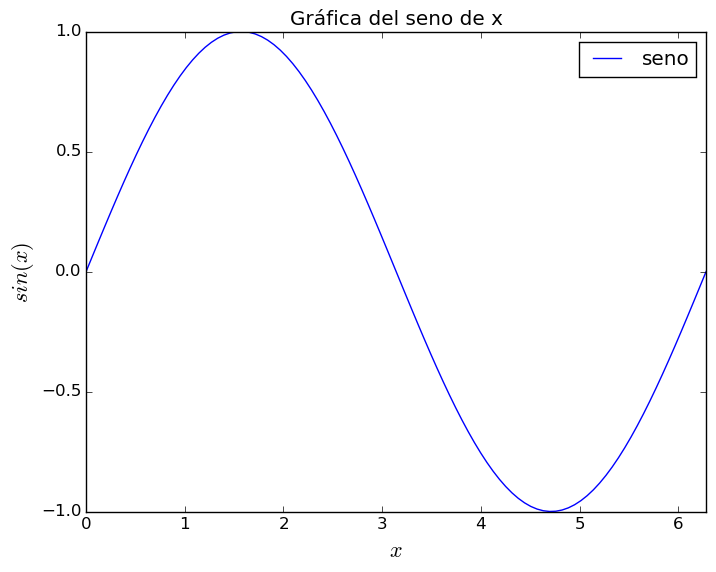

PyObject <matplotlib.legend.Legend object at 0x7fa37dc7eb10>

In [11]:
dominio = collect(linspace(0,2π,100))
plot(dominio, sin(dominio),label = "seno")

title("Gráfica del seno de x")
xlabel(L"x", fontsize = 16)
ylabel(L"sin(x)",fontsize = 16)
xlim(0,2π)

legend()
#show()

### Más de una curva y guardar imágenes

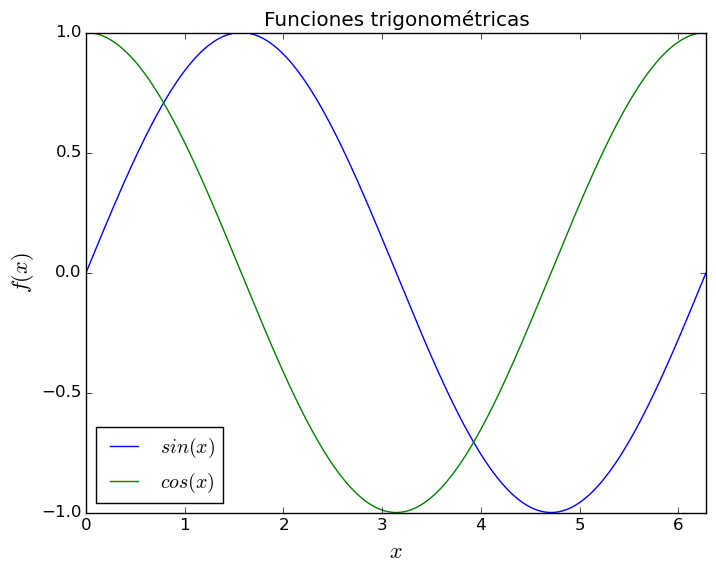

In [12]:
dominio = collect(linspace(0,2π,1000))

plot(dominio, sin(dominio),label = L"sin(x)")
plot(dominio, cos(dominio),label = L"cos(x)")

title("Funciones trigonométricas")

xlabel(L"x", fontsize = 16)
ylabel(L"f(x)",fontsize = 16)
xlim(0,2π)
legend(loc="best")

savefig("sencos.png")

#show()

### Subfiguras

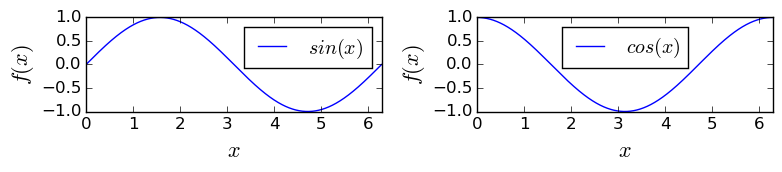

In [18]:
subplot(121,aspect="equal")
plot(dominio, sin(dominio),label = L"sin(x)")
xlabel(L"x", fontsize = 16)
ylabel(L"f(x)",fontsize = 16)
xlim(0,2π)
legend(loc="best")

subplot(122,aspect="equal")
plot(dominio, cos(dominio),label = L"cos(x)")
xlabel(L"x", fontsize = 16)
ylabel(L"f(x)",fontsize = 16)
xlim(0,2π)
legend(loc="best")

PyPlot.tight_layout()

#show()

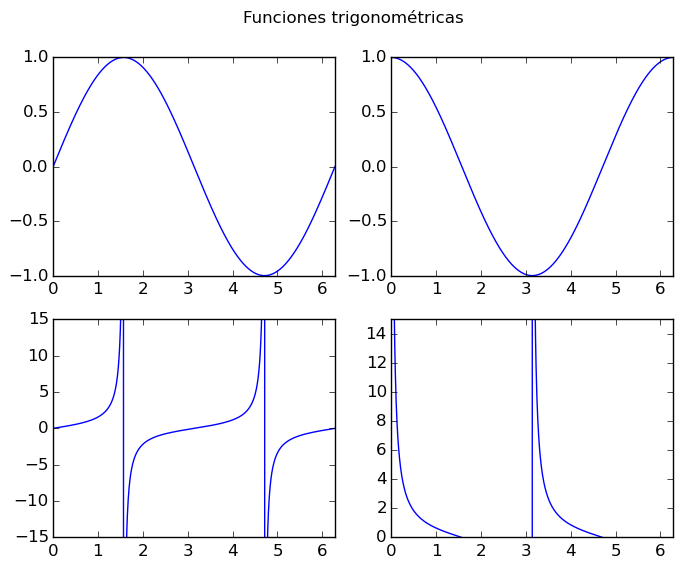

PyObject <matplotlib.text.Text object at 0x7fa37cf79c90>

In [20]:
subplot(221)
plot(dominio, sin(dominio),label = L"sin(x)")
xlim(0,2π)

subplot(222)
plot(dominio, cos(dominio),label = L"cos(x)")
xlim(0,2π)

subplot(223)
plot(dominio, tan(dominio),label = L"tan(x)")
ylim(-15,15)
xlim(0,2π)

subplot(224)
plot(dominio, cot(dominio),label = L"cot(x)")
xlim(0,2π)
ylim(0,15)

suptitle("Funciones trigonométricas")

#show()

### Gráfica de una matriz

In [21]:
rand(5)

5-element Array{Float64,1}:
 0.175354 
 0.0471828
 0.356161 
 0.472069 
 0.784443 

In [22]:
rand(5,5)

5x5 Array{Float64,2}:
 0.937838  0.354646   0.737873  0.5264    0.437987
 0.371472  0.184099   0.460541  0.586058  0.335995
 0.793007  0.782124   0.522708  0.904365  0.879942
 0.530354  0.0866466  0.512296  0.154255  0.059605
 0.742237  0.915035   0.474195  0.663369  0.864128

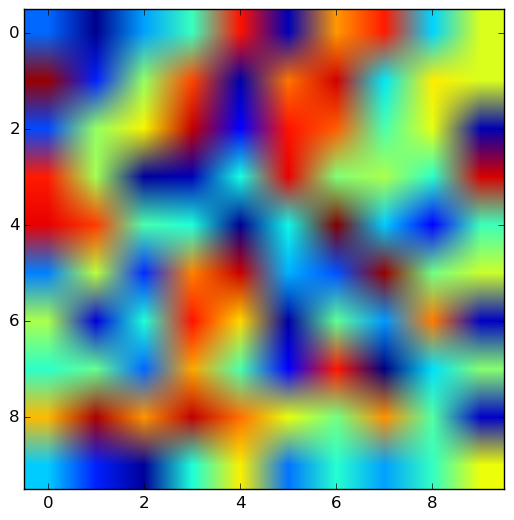

PyObject <matplotlib.image.AxesImage object at 0x7fa37cdafa10>

In [24]:
datos = rand(10,10)
imshow(datos)
#show()

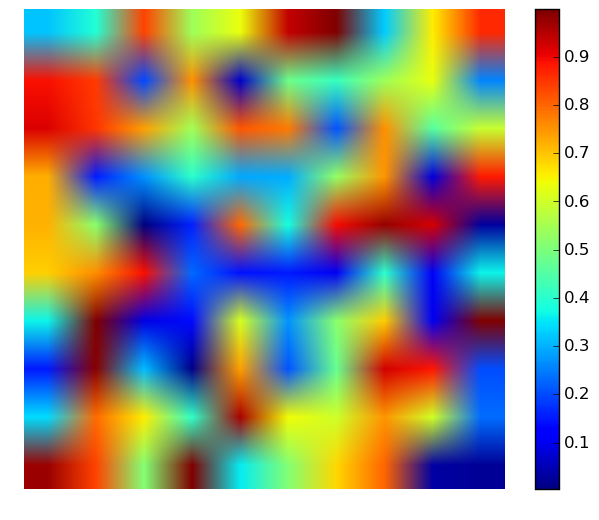

PyObject <matplotlib.colorbar.Colorbar instance at 0x7fa37c872488>

In [31]:
datos = rand(10,10)
imshow(datos)

axis("off")
colorbar()

#show()

## Animaciones

Tomada de [aquí](http://stackoverflow.com/questions/35142199/implementing-an-iterator-in-julia-for-an-animation-with-pyplot) con pequeñas modificaciones.

In [33]:
using PyCall

In [35]:
pygui(true)

@pyimport matplotlib.animation as animation

function simDataSin()
    t_max = 10.0
    dt = 0.005
    x = 0.0
    t = -dt

    function it()
        while t < t_max
            x = sin(pi * t)
            t = t + dt
            produce(x, t)
        end
    end

    Task(it)
end

function simDataCos()
    t_max = 10.0
    dt = 2^-8.0
    x = 0.0
    t = -dt

    function it()
        while t < t_max
            x = cos(pi * t)
            t = t + dt
            produce(x, t)
        end
    end

    Task(it)
end

function simPoints(parameter)
    
    if parameter == 0
        task = simDataSin()
    else
        task = simDataCos()
    end

    function points(frame_number)
        x, t = consume(task)
        line[:set_data](t, x)
        return(line, "")
    end

    points
end


figure = plt[:figure]()
axis = figure[:add_subplot](111)
line = axis[:plot]([], [], "bo", ms = 10)[1]
axis[:set_ylim](-1, 1)
axis[:set_xlim](0, 10)

#ani = animation.FuncAnimation(figure, simPoints(0), blit=false, interval=10, frames=2560, repeat=false)
ani = animation.FuncAnimation(figure, simPoints(0), blit=false, interval=10, frames=2000, repeat=false)

plt[:show]()

## Histogramas

In [52]:
pygui(true)
datos = rand(1000)

#PyPlot.plt.hist(datos,100)
hist(datos,20)

(0.0:0.05:1.0,[60,48,52,55,53,55,48,55,43,42,50,49,40,53,43,43,42,59,61,49])